In [1]:
# Group skills to determine median salary and likelihood of being in posting
# Visualize median salary vs percent skill demand
# Determine if certain technologies are more prevalent

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
import seaborn as sns

In [3]:
df=pd.read_csv(r"F:\Jupyter\data_jobs.csv")
df["job_posted_date"]=pd.to_datetime(df["job_posted_date"])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [4]:
df_DA_IND = df[(df['job_title_short'] == 'Data Analyst') &   (df['job_country'] == 'India')].copy()

In [5]:
df_DA_IND = df_DA_IND.dropna(subset=['salary_year_avg'])

df_DA_IND_exploded = df_DA_IND.explode('job_skills')

df_DA_IND_exploded[['salary_year_avg','job_skills']].head(5)

,salary_year_avg,job_skills
11412,50400.0,python
11412,50400.0,sql
11412,50400.0,aws
11412,50400.0,azure
11412,50400.0,excel


In [16]:
df_DA_skills = df_DA_IND_exploded.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count',ascending=False)

df_DA_skills = df_DA_skills.rename(columns = {'count':'skill_count' , 'median':'median_salary'})

df_DA_skills

,skill_count,median_salary
job_skills,,
sql,46,96050.0
excel,39,98500.0
python,36,96050.0
tableau,20,108087.5
r,18,79200.0
...,...,...
postgresql,1,165000.0
ms access,1,64600.0
mysql,1,165000.0


In [19]:
DA_job_count = len(df_DA_IND)

df_DA_skills['skills_percent'] = df_DA_skills['skill_count'] / DA_job_count * 100

df_DA_skills

,skill_count,median_salary,skills_percent
job_skills,,,
sql,46,96050.0,48.936170
excel,39,98500.0,41.489362
python,36,96050.0,38.297872
tableau,20,108087.5,21.276596
r,18,79200.0,19.148936
...,...,...,...
postgresql,1,165000.0,1.063830
ms access,1,64600.0,1.063830
mysql,1,165000.0,1.063830


In [48]:
skill_percent = 10

df_DA_IND_high_demand = df_DA_skills[df_DA_skills['skills_percent'] > skill_percent]

df_DA_IND_high_demand

,skill_count,median_salary,skills_percent
job_skills,,,
sql,46,96050.00,48.936170
excel,39,98500.00,41.489362
python,36,96050.00,38.297872
tableau,20,108087.50,21.276596
r,18,79200.00,19.148936
power bi,17,111175.00,18.085106
azure,15,93600.00,15.957447
aws,12,79200.00,12.765957
oracle,11,79200.00,11.702128


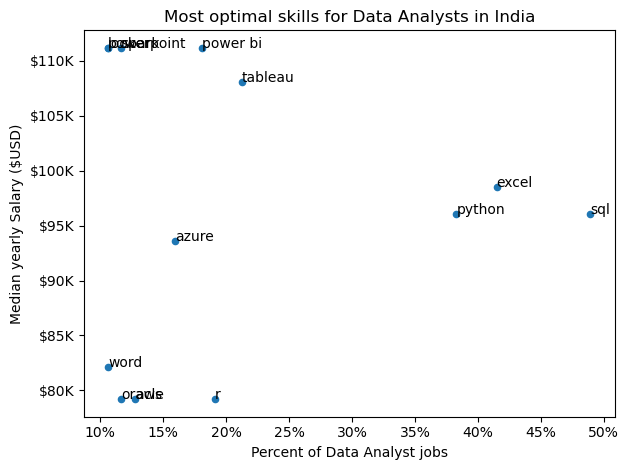

In [114]:
df_DA_IND_high_demand.plot(kind='scatter',x='skills_percent',y='median_salary')
plt.xlabel('Percent of Data Analyst jobs')
plt.ylabel('Median yearly Salary ($USD)')
plt.title('Most optimal skills for Data Analysts in India')

for i,txt in enumerate(df_DA_IND_high_demand.index):
    plt.text(df_DA_IND_high_demand['skills_percent'].iloc[i],df_DA_IND_high_demand['median_salary'].iloc[i],txt)

ax =plt.gca()
#To access the axes of the plot...we introduced the first line fig,ax ...and now the above line gca denotes (get
#current axis)

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y,pos:f'${int(y/1000)}K'))
from matplotlib.ticker import PercentFormatter
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))
#Here we are mentioning that we wanna format the yxis..thereby using funcformatter class ...have to use specifically with
# lambda function (inside this ..pos means position) the above code prints the same old yaxis values
#if u print pos - (lambda y,pos:pos) - it returns 1 , 2 , 3 ...kind of an index

plt.tight_layout()
plt.show()

In [50]:
df['job_type_skills'].head(5)

0                                                  NaN
1    {'analyst_tools': ['power bi', 'tableau'], 'pr...
2    {'analyst_tools': ['dax'], 'cloud': ['azure'],...
3    {'cloud': ['aws'], 'libraries': ['tensorflow',...
4    {'cloud': ['oracle', 'aws'], 'other': ['ansibl...
Name: job_type_skills, dtype: object

In [51]:
df_technology = df['job_type_skills'].copy()

# remove duplicates
df_technology = df_technology.drop_duplicates()

# remove NaN values
df_technology = df_technology.dropna()

# combine all dictionaries into one
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)  # convert string to dictionary
    for key, value in row_dict.items():
        if key in technology_dict:  # if key already exists in technology_dict, add value to existing value
            technology_dict[key] += value
        else:                       # if key does not exist in technology_dict, add key and value
            technology_dict[key] = value

# remove duplicates by converting values to set then back to list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict

{'analyst_tools': ['word',
  'nuix',
  'powerpoint',
  'datarobot',
  'alteryx',
  'outlook',
  'ms access',
  'qlik',
  'visio',
  'splunk',
  'tableau',
  'microstrategy',
  'sheets',
  'sap',
  'msaccess',
  'powerbi',
  'sas',
  'looker',
  'cognos',
  'dax',
  'spss',
  'ssis',
  'esquisse',
  'excel',
  'ssrs',
  'spreadsheet',
  'sharepoint',
  'power bi'],
 'programming': ['css',
  'elixir',
  'dart',
  'erlang',
  'sql',
  'vba',
  'visual basic',
  'julia',
  'clojure',
  'matlab',
  'kotlin',
  'visualbasic',
  'powershell',
  'delphi',
  'perl',
  'objective-c',
  'javascript',
  'ocaml',
  'go',
  'c',
  'shell',
  'mongodb',
  'fortran',
  'typescript',
  'scala',
  'java',
  'mongo',
  'lisp',
  'vb.net',
  'sas',
  'groovy',
  'assembly',
  'golang',
  'no-sql',
  'pascal',
  'php',
  'rust',
  'swift',
  'lua',
  'r',
  'html',
  'haskell',
  'c#',
  'apl',
  'nosql',
  'bash',
  'sass',
  't-sql',
  'crystal',
  'f#',
  'cobol',
  'c++',
  'python',
  'solidity',
  'r

In [52]:
# turn dictionary into dataframe
df_technology = pd.DataFrame(list(technology_dict.items()), columns=['technology', 'skills'])

df_technology = df_technology.explode('skills')

df_technology

,technology,skills
0,analyst_tools,word
0,analyst_tools,nuix
0,analyst_tools,powerpoint
0,analyst_tools,datarobot
0,analyst_tools,alteryx
...,...,...
9,sync,webex
9,sync,zoom
9,sync,rocketchat
9,sync,microsoft teams


In [82]:
# merge df_DA_skills and df_technology
df_plot = df_DA_skills.merge(df_technology, left_on='job_skills', right_on='skills')
df_plot

,skill_count,median_salary,skills_percent,technology,skills
0,46,96050.0,48.936170,programming,sql
1,39,98500.0,41.489362,analyst_tools,excel
2,36,96050.0,38.297872,programming,python
3,20,108087.5,21.276596,analyst_tools,tableau
4,18,79200.0,19.148936,programming,r
...,...,...,...,...,...
80,1,165000.0,1.063830,databases,postgresql
81,1,64600.0,1.063830,analyst_tools,ms access
82,1,165000.0,1.063830,databases,mysql
83,1,163782.0,1.063830,databases,neo4j


In [83]:
df_plot_programming = df_plot[df_plot['technology'].str.contains('programming')]
df_plot_programming

,skill_count,median_salary,skills_percent,technology,skills
0,46,96050.0,48.936170,programming,sql
2,36,96050.0,38.297872,programming,python
4,18,79200.0,19.148936,programming,r
14,6,163782.0,6.382979,programming,mongodb
20,4,111175.0,4.255319,programming,go
23,3,79200.0,3.191489,programming,java
24,3,79200.0,3.191489,programming,nosql
25,3,163782.0,3.191489,programming,scala
34,2,79200.0,2.127660,programming,sas
36,2,118500.0,2.127660,programming,shell


In [84]:
df_plot_programming =df_plot_programming.sort_values(by='median_salary',ascending=False).head(5)
df_plot_programming

,skill_count,median_salary,skills_percent,technology,skills
14,6,163782.0,6.382979,programming,mongodb
25,3,163782.0,3.191489,programming,scala
36,2,118500.0,2.127660,programming,shell
43,2,114291.0,2.127660,programming,no-sql
20,4,111175.0,4.255319,programming,go


In [89]:
df_plot_analyst_tools = df_plot[df_plot['technology'].str.contains('analyst_tools')]
df_plot_analyst_tools

,skill_count,median_salary,skills_percent,technology,skills
1,39,98500.00,41.489362,analyst_tools,excel
3,20,108087.50,21.276596,analyst_tools,tableau
5,17,111175.00,18.085106,analyst_tools,power bi
10,10,82092.75,10.638298,analyst_tools,word
11,10,111175.00,10.638298,analyst_tools,looker
12,10,111175.00,10.638298,analyst_tools,powerpoint
22,4,95187.50,4.255319,analyst_tools,sap
27,3,64800.00,3.191489,analyst_tools,alteryx
32,3,93600.00,3.191489,analyst_tools,sheets
33,2,79200.00,2.127660,analyst_tools,sas


In [91]:
df_plot_analyst_tools =df_plot_analyst_tools.sort_values(by='median_salary',ascending=False).head(6)
df_plot_analyst_tools

,skill_count,median_salary,skills_percent,technology,skills
63,1,119250.0,1.063830,analyst_tools,visio
5,17,111175.0,18.085106,analyst_tools,power bi
11,10,111175.0,10.638298,analyst_tools,looker
12,10,111175.0,10.638298,analyst_tools,powerpoint
53,2,111175.0,2.127660,analyst_tools,dax
3,20,108087.5,21.276596,analyst_tools,tableau


In [94]:
df_plot_libraries = df_plot[df_plot['technology'].str.contains('libraries')]
df_plot_libraries

,skill_count,median_salary,skills_percent,technology,skills
9,11,111175.0,11.702128,libraries,spark
18,5,79200.0,5.319149,libraries,hadoop
21,4,111175.0,4.255319,libraries,pandas
39,2,95187.5,2.127660,libraries,plotly
42,2,138087.5,2.127660,libraries,airflow
46,2,111175.0,2.127660,libraries,electron
48,2,163782.0,2.127660,libraries,gdpr
52,2,122100.0,2.127660,libraries,kafka
67,1,79200.0,1.063830,libraries,tensorflow
70,1,79200.0,1.063830,libraries,spring


In [95]:
df_plot_libraries =df_plot_libraries.sort_values(by='median_salary',ascending=False).head(10)
df_plot_libraries

,skill_count,median_salary,skills_percent,technology,skills
77,1,165000.0,1.063830,libraries,pyspark
48,2,163782.0,2.127660,libraries,gdpr
42,2,138087.5,2.127660,libraries,airflow
52,2,122100.0,2.127660,libraries,kafka
9,11,111175.0,11.702128,libraries,spark
21,4,111175.0,4.255319,libraries,pandas
46,2,111175.0,2.127660,libraries,electron
79,1,111175.0,1.063830,libraries,matplotlib
72,1,102500.0,1.063830,libraries,numpy
39,2,95187.5,2.127660,libraries,plotly


In [96]:
df_plot_databases = df_plot[df_plot['technology'].str.contains('databases')]
df_plot_databases

,skill_count,median_salary,skills_percent,technology,skills
15,6,163782.0,6.382979,databases,mongodb
17,5,72000.0,5.319149,databases,sql server
49,2,66107.0,2.127660,databases,cassandra
57,1,53014.0,1.063830,databases,db2
68,1,79200.0,1.063830,databases,elasticsearch
71,1,79200.0,1.063830,databases,dynamodb
80,1,165000.0,1.063830,databases,postgresql
82,1,165000.0,1.063830,databases,mysql
83,1,163782.0,1.063830,databases,neo4j


In [97]:
df_plot_databases =df_plot_databases.sort_values(by='median_salary',ascending=False).head(10)
df_plot_databases

,skill_count,median_salary,skills_percent,technology,skills
80,1,165000.0,1.063830,databases,postgresql
82,1,165000.0,1.063830,databases,mysql
15,6,163782.0,6.382979,databases,mongodb
83,1,163782.0,1.063830,databases,neo4j
68,1,79200.0,1.063830,databases,elasticsearch
71,1,79200.0,1.063830,databases,dynamodb
17,5,72000.0,5.319149,databases,sql server
49,2,66107.0,2.127660,databases,cassandra
57,1,53014.0,1.063830,databases,db2


In [101]:
new_df = pd.concat([df_plot_programming,df_plot_analyst_tools,df_plot_libraries,df_plot_databases])
new_df

,skill_count,median_salary,skills_percent,technology,skills
14,6,163782.0,6.382979,programming,mongodb
25,3,163782.0,3.191489,programming,scala
36,2,118500.0,2.127660,programming,shell
43,2,114291.0,2.127660,programming,no-sql
20,4,111175.0,4.255319,programming,go
63,1,119250.0,1.063830,analyst_tools,visio
5,17,111175.0,18.085106,analyst_tools,power bi
11,10,111175.0,10.638298,analyst_tools,looker
12,10,111175.0,10.638298,analyst_tools,powerpoint
53,2,111175.0,2.127660,analyst_tools,dax


In [102]:
new_df = new_df.reset_index()

In [107]:
new_df.drop(columns='index',inplace=True)

In [112]:
new_df.set_index('skills',inplace=True)

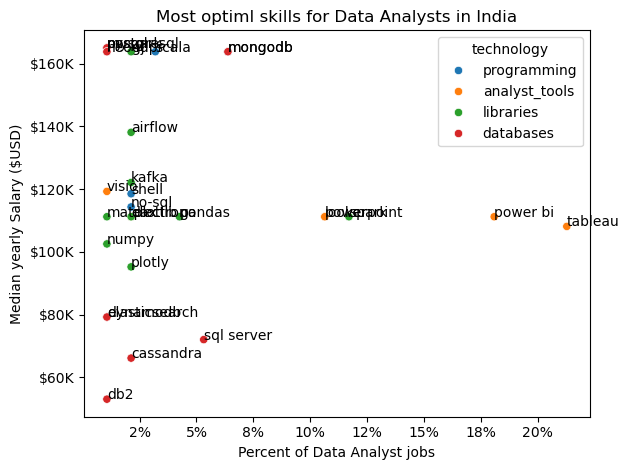

In [113]:
#new_df.plot(kind='scatter',x='skills_percent',y='median_salary')
sns.scatterplot(
    data=new_df,
    x='skills_percent',
    y='median_salary',
    hue='technology')
plt.xlabel('Percent of Data Analyst jobs')
plt.ylabel('Median yearly Salary ($USD)')
plt.title('Most optiml skills for Data Analysts in India')

for i,txt in enumerate(new_df.index):
    plt.text(new_df['skills_percent'].iloc[i],new_df['median_salary'].iloc[i],txt)

ax =plt.gca()
#To access the axes of the plot...we introduced the first line fig,ax ...and now the above line gca denotes (get
#current axis)

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y,pos:f'${int(y/1000)}K'))
from matplotlib.ticker import PercentFormatter
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))
#Here we are mentioning that we wanna format the yxis..thereby using funcformatter class ...have to use specifically with
# lambda function (inside this ..pos means position) the above code prints the same old yaxis values
#if u print pos - (lambda y,pos:pos) - it returns 1 , 2 , 3 ...kind of an index

plt.tight_layout()
plt.show()